In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-game-stats-04082025/Video Game Stats 11686ad8f53480e78715ebabdf6f3002_all.csv


# Objectives
* Ultimate goal is to build out a good predictive model for game recommender based on my personal metrics
    * Identify patterns in the data
    * Identify if the data can be used to build out a predictive model,
        * If it cannot, identify recommendations to improve data predictability
    * Once predictive model looks good,
        * host it (huggingface)
        * identify ways to monitor and train predictive model to keep it accurate

In [2]:
df = pd.read_csv("/kaggle/input/video-game-stats-04082025/Video Game Stats 11686ad8f53480e78715ebabdf6f3002_all.csv")
df.head(1)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Name,🎳 Raw Playtime,Playtime 2-week,appId,Event,Total playtime (hrs),Raw Genres,Raw Categories,Raw Developers,Raw Publishers,...,playtime_deck_forever (hr),playtime_forever,playtime_forever (hr),playtime_linux_forever,playtime_linux_forever (hr),playtime_mac_forever,playtime_mac_forever (hr),playtime_windows_forever,playtime_windows_forever (hr),price_overview_initial
0,Another Crab's Treasure,Another Crab's Treasure (https://www.notion.so...,NaN,1887840.0,Indie Video Game Book Club - Toronto,25.61,"Action, Adventure, Indie","Family Sharing, Full controller support, Singl...",Aggro Crab,Aggro Crab,...,0.0,NaN,0.0,NaN,0.0,NaN,0,NaN,0.0,2999.0


In [3]:
df.describe().T

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,count,mean,std,min,25%,50%,75%,max
appId,70.0,2.072808e+06,960008.641789,620.00,1450160.00,2310260.000,2947342.500,3.481170e+06
Total playtime (hrs),74.0,7.597432e+00,17.453950,0.02,0.39,1.500,7.675,1.277100e+02
Personal Rating (1-5),46.0,3.336957e+00,0.603732,2.00,3.00,3.375,3.500,4.500000e+00
Publishers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Developers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metacritic_score,20.0,8.310000e+01,6.632456,70.00,79.75,82.000,87.500,9.600000e+01
playtime_deck_forever,5.0,6.868000e+02,828.216578,75.00,223.00,328.000,698.000,2.110000e+03
playtime_deck_forever (hr),74.0,7.734234e-01,4.336882,0.00,0.00,0.000,0.000,3.516667e+01
playtime_forever,14.0,1.640071e+03,2566.864698,2.00,62.25,385.000,1958.500,7.840000e+03
playtime_forever (hr),74.0,5.171396e+00,21.026509,0.00,0.00,0.000,0.000,1.306667e+02


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

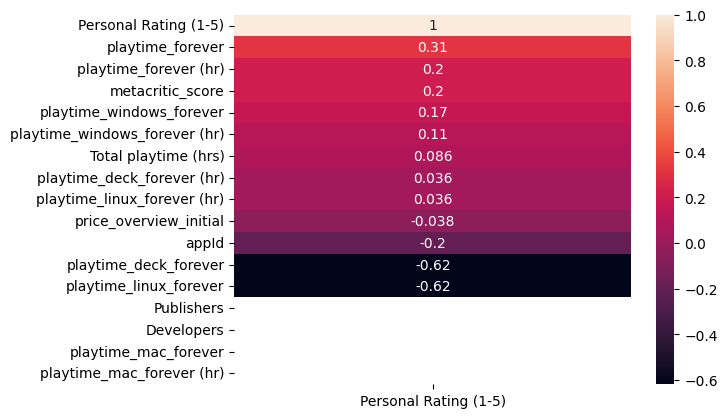

In [5]:
sns.heatmap(
    df.corr(numeric_only=True)[['Personal Rating (1-5)']].sort_values(by='Personal Rating (1-5)',ascending=False),
    annot=True
)

It appears that the highest correlation for numeric features looks to be associated with SteamDeck usage.